# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: 

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [365]:
# TODO: Import dataset and inspect the first five columns
file_path = 'seeds_dataset.txt'

df = pd.read_csv(file_path, delimiter='\t', header=None)


df.head(5)

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [366]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = df.drop([7], axis =1)
y = df[7]


print(X.shape)
print(y.shape)

(210, 7)
(210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*

For the Scaling we will be using standard scaling this will ensure that all feautres have the same scale. The reason for this is becuase when performing PCA we dont want one feature with a learge scale to dominate the anaylisis. 

Before we implement the scaler, we need to split the data into training and testing sets first.

In [367]:
# TODO: Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)



In [368]:
# TODO: Print the shape of the training feature matrix and target vector
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (157, 7)
Shape of y_train: (157,)


Now that we have our training data, we can implement our selected scaler.

In [369]:
# TODO: Scale the data

scaler = StandardScaler()
scaler.fit(X_train, y_train)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


display(X_train_scaled.head(5))
display(X_test_scaled.head(5))


,0,1,2,3,4,5,6
0,-0.754740,-0.775143,-0.151794,-0.901350,-0.600906,0.343337,-0.979847
1,-1.250216,-1.231308,-1.281600,-1.204462,-1.363990,0.482037,-0.809583
2,-1.219462,-1.170486,-1.438165,-1.013370,-1.385335,0.307155,-0.288890
3,1.295509,1.330822,0.372909,1.279744,1.093353,-0.939135,1.362280
4,1.452695,1.551302,-0.020618,1.609214,1.085349,-0.155848,1.623617


,0,1,2,3,4,5,6
0,1.305760,1.209178,1.172659,1.042525,1.586957,0.400961,1.154399
1,-1.253633,-1.200897,-1.552415,-0.989208,-1.505400,1.169507,-0.627439
2,-0.652227,-0.630690,-0.342211,-0.530146,-0.662273,-0.145128,-1.156051
3,1.353599,1.247192,1.210743,1.297316,1.320144,0.033105,1.102924
4,1.333097,1.292808,0.825678,0.879987,1.365502,-0.694567,0.930680


### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [370]:
# TODO: Instantiate model

logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [371]:

param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [372]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score


grid_search = GridSearchCV(logistic_regression_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)


print("Best Parameters:", grid_search.best_params_)
print(f'Best grid estimator: {grid_search.best_estimator_ }')

print("Cross Validation Score")
print(f'Cross-Validation accuracy {grid_search.best_score_:.7f}')



print("Test Score")
test = grid_search.score(X_test_scaled, y_test)
print(f'This is the test score {test:.7f}')




Best Parameters: {'C': 1.0, 'fit_intercept': True}
Best grid estimator: LogisticRegression(max_iter=1000)
Cross Validation Score
Cross-Validation accuracy 0.9366935
Test Score
This is the test score 0.9056604


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [373]:
# TODO: Predict y labels using best estimator
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

display(y_pred)

array([2, 3, 1, 2, 2, 3, 3, 1, 2, 2, 2, 2, 3, 2, 3, 1, 2, 2, 3, 1, 3, 1,
       3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 2, 2, 1, 1, 3, 2, 1, 1, 2, 3, 3, 1,
       2, 1, 3, 1, 3, 2, 2, 2, 3], dtype=int64)

In [374]:
# TODO: Reduce dimensions of test data for plottingfrom sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components=2)

# fit PCA model to beast cancer data
pca_x_test_scaled = pca.fit_transform(X_test_scaled)

# transform data onto the first two principal components
pca_x_test_scaled.shape

(53, 2)

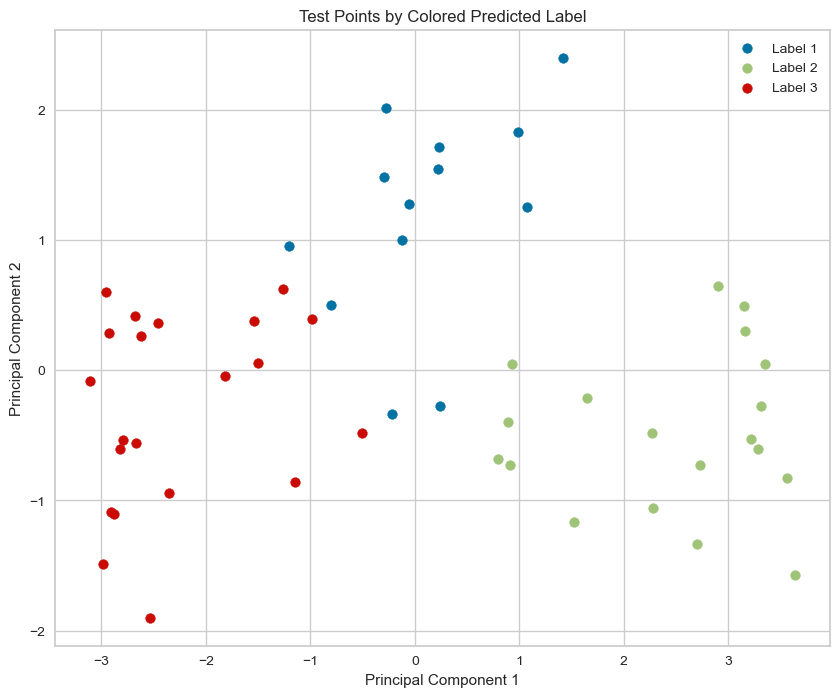

In [375]:
# TODO: Plot test points colored by predicted label
markers = ['o', 's', '^', 'D', 'P']  # Add more markers if needed

plt.figure(figsize=(10, 8))
for i, label in enumerate(sorted(set(y_pred))):
    indices = (y_pred == label)
    plt.scatter(pca_x_test_scaled[indices, 0], pca_x_test_scaled[indices, 1], label=f'Label {label}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Test Points by Colored Predicted Label')
plt.legend()
plt.show()







#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

#### Answers

1. I found that the logistic regression model worked well for this dataset. Looking at the training and testing score we can see that they both produced a score of around 0.95 and then a testing score of 0.95 

2. Looking at the diagram above we can state that PCA performed well as there a distinct clumps of each class. As PCA and LR are both linear models its possible that the dataset is linear and thats why both of these models produce good scores.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. I used the code from the lab and other assignments inorder to complete this assignment. 
2. I finished the assignment in order they steps were given as the steps built of each other. 
3. I did not use generative AI for this portion of the assignment as i found I was able to compelete the assignment with out the help of AI. 
4. Some of the models I found hard to plot just understadning what was truly going on when building the plot definition. For this I used both the previous labs in order to figure out how to properly plot each cluster in a different color.

*DESCRIBE YOUR PROCESS HERE*

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [376]:
# TODO: Scale feature matrix
df = pd.read_csv(file_path, delimiter='\t', header=None)
df = df.drop([7],axis = 1)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)



The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

c:\Users\Braden\AppData\Local\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Braden\AppData\Local\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Braden\AppData\Local\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Braden\AppData\Local\anaconda3\envs\ensf-ml\lib\site-packages\sklearn

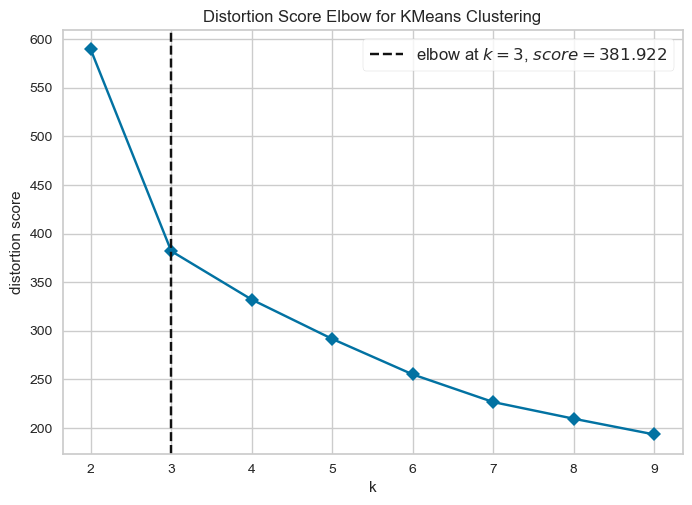

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(2, 10),
                 timings=False)

In [377]:
# TODO: Use the elbow method to determine the optimal number of clusters
kelbow_visualizer(KMeans(random_state=0), df_scaled, k=(2,10),
                  metric='distortion',
                 timings=False)

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [378]:
# TODO: Implement K-means with the number of clusters determined in the previous step
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_scaled)

c:\Users\Braden\AppData\Local\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Braden\AppData\Local\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [379]:
# TODO: Calculate the three different validation metrics
labels = kmeans.labels_

# Calculate Silhouette score
#Between -1 and 1 
silhouette_avg = silhouette_score(df_scaled, labels)
print("Silhouette Score:", silhouette_avg)

# Calculate Calinski-Harabasz score
calinski_harabasz_avg = calinski_harabasz_score(df_scaled, labels)
print("Calinski-Harabasz Score:", calinski_harabasz_avg)

# Calculate Davies-Bouldin score
davies_bouldin_avg = davies_bouldin_score(df_scaled, labels)
print("Davies-Bouldin Score:", davies_bouldin_avg)

Silhouette Score: 0.3926243083532718
Calinski-Harabasz Score: 237.95748661163898
Davies-Bouldin Score: 0.9212224108769078


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

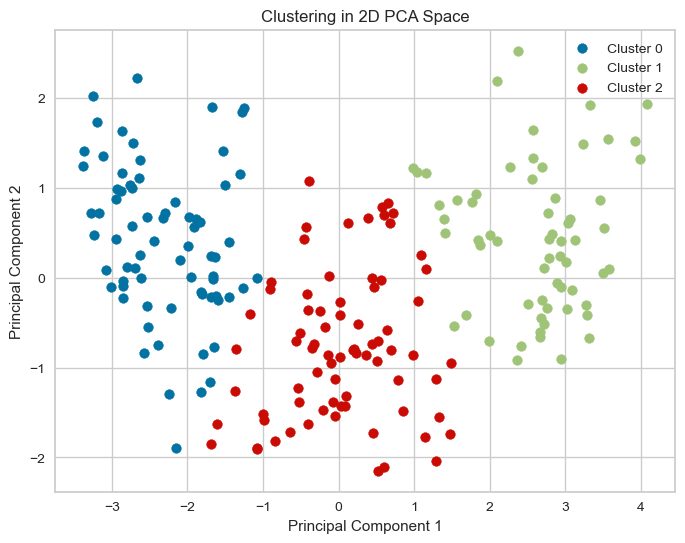

In [380]:
# TODO: Plot clustering results
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Visualize clusters using a 2D scatter plot
plt.figure(figsize=(8, 6))

# Plot data points with different colors for each cluster
for label in set(labels):
    indices = labels == label
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=f'Cluster {label}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering in 2D PCA Space')
plt.legend()
plt.show()


### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

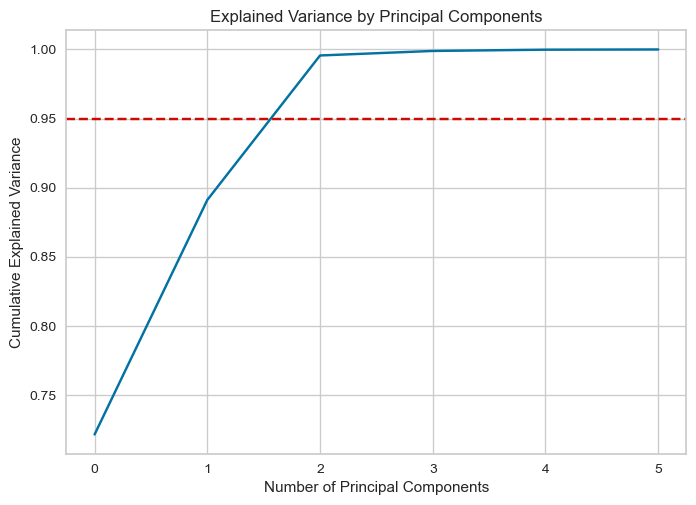

In [381]:
#TODO: Find the number of principal components using explained variance ratio
pca = PCA().fit(df_scaled)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components explaining desired variance (e.g., 95%)
n_components_desired_variance = np.argmax(cumulative_variance_ratio >= 0.95) + 1  # +1 for zero-based indexing


# Plot the explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Explained')
plt.title('Explained Variance by Principal Components')
plt.show()


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [386]:
# TODO: Use PCA to transform the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
display(explained_variance_ratio)

array([0.72143204, 0.16970453])

In [383]:
# TODO: Implement K-means with the transformed data
kmeans = KMeans(n_clusters=3, random_state=0)

# fit KMeans to the transformed data
kmeans.fit(X_pca)

# obtain cluster labels for the data points
cluster_labels = kmeans.labels_

# access cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

# access the inertia (sum of squared distances of samples to their closest cluster center)
inertia = kmeans.inertia_




c:\Users\Braden\AppData\Local\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Braden\AppData\Local\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [387]:
# TODO: Calculate the three different validation metrics
# TODO: Plot clustering results

silhouette = silhouette_score(X_pca, cluster_labels)
calinski_harabasz = calinski_harabasz_score(X_pca, cluster_labels)
davies_bouldin = davies_bouldin_score(X_pca, cluster_labels)

print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")



Silhouette Score: 0.47936645080299023
Calinski-Harabasz Index: 366.2487719947506
Davies-Bouldin Index: 0.7197010110093113


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [388]:
# TODO: Display results
metrics_data = {
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'],
    'Value': [silhouette, calinski_harabasz, davies_bouldin]
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

                    Metric       Value
0         Silhouette Score    0.479366
1  Calinski-Harabasz Index  366.248772
2     Davies-Bouldin Index    0.719701


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*


1. Yes as the oringinal dataset had three different labels this would lead to having the same number of clusters. 
2. The two plots do show very similar distributiuons of the dataset. This would lead me to belive that they show very simialr results. 
3. Based on the above graph we can see that 2 componets would be able to explain 95 % of the variance. Based on the scores seen of the three metrics Silhouette going from 0.395 to 0.479, Calinski moving from 246 to 366 and then finally Davies bouldin score reducing from 0.94 to 0.71 i would say yes PCA improved the results. This could be due to the fact that the number of features was reduced which tends to increase the clustering accuracy scores. 

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. I sourced most of the code from assignemnts and the labs we perfomred in the class. Pulling from these examples help me walk through this assignment. 
2. I completed the assignment in the order it was given as each step built on each other. 
3. I did not use generative AI for this portion of the assignment. 
4. For this postion of the assignment I found it most challenging understanding some of the scores. For instance the Calinski-Harabasz score as there is no range its just the higher score indicates a better performance. This was hard to understand at first as theres no baseline to it. 

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

1. I enjoyed working on a new datset on this assignment that was not health related. It was also interesting seeing how the model and work flow was completed with out the use of headers for the data. 
2. I liked working with the clustering approach as it was a different way of visulizing the data. I found this way of seeing that data helps me understand the realtionshi more than the three different scores. Looking at the distribution of points made more sense then the scores in my opinion. 